# ✏️ Esercizi

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz as az
import pingouin as pg
import seaborn as sns

In [6]:
%config InlineBackend.figure_format = 'retina'

# set seed to make the results fully reproducible
seed: int = sum(map(ord, "quiz_t_test"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")

Iniziamo descrivendo le due funzioni necessarie per trovare l'area in una coda della distribuzione t (p-value) specificando i gradi di libertà e per trovare il valore critico t specificando la probabilità.

1. Funzione per trovare **l'area in una coda** della distribuzione t (p-value):

`stats.t.cdf(value, df)`

Per esempio, la probabilità di osservare un valore maggiore di 2.2 in una t di Student con 10 gradi di libertà è

In [5]:
1 - stats.t.cdf(2.2, 10)

0.026220534224676517

La probabilità di un valore minore di -2.2 in una t di Student con 10 gradi di libertà è

In [7]:
stats.t.cdf(-2.2, 10)

0.02622053422467655

2. Funzione per trovare il **valore critico** t (valore t per una data probabilità):

`critical_value = stats.t.ppf(1 - prob, df)`

Per esempio, il valore t con 10 gradi di libertà che lascia sopra di sè una probabilità di 0.026220534224676517 è

In [8]:
prob = 0.026220534224676517
df = 10
stats.t.ppf(1 - prob, df)

2.1999999999825763

Il valore t con 10 gradi di libertà che lascia sotto di sè una probabilità di 0.026220534224676517 è

In [9]:
stats.t.ppf(prob, df)

-2.1999999999825763

## Esercizio 1

Supponiamo di voler esaminare l'efficacia di un breve intervento psicologico per ridurre i livelli di stress. Un piccolo gruppo di partecipanti ha compilato un questionario di autovalutazione per misurare il loro livello di stress su una scala da 0 a 100 (dove 100 indica il massimo stress) prima di partecipare all'intervento. Dopo l'intervento, questi stessi partecipanti compilano di nuovo il questionario. Gli scienziati vogliono sapere se ci sia stata una riduzione statisticamente significativa nei livelli di stress.

Per questo esercizio, supponiamo di avere solo i dati post-intervento di 10 partecipanti. I dati sono i seguenti. Post-intervention stress levels: [45,50,35,40,50,35,30,55,40,60].

### Obiettivi dell'Esercizio:
1. **Calcolo dell'Intervallo di Confidenza**: Calcolare l'intervallo di confidenza al 95% per la media dei livelli di stress post-intervento.
2. **Test dell'Ipotesi Nulla**:
   - **Bidirezionale**: Testare se la media è significativamente diversa da 50.
   - **Monodirezionale Destro**: Testare se la media è significativamente maggiore di 50.
   - **Monodirezionale Sinistro**: Testare se la media è significativamente inferiore di 50.
3. **Replicazione con `pingouin`**: Usare la libreria Python `pingouin` per replicare i test t.

### Intervallo di Confidenza

Per calcolare manualmente l'intervallo di confidenza al 95% per una media campionaria, possiamo seguire i passaggi seguenti, applicando esplicitamente le formule.

L'intervallo di confidenza per la media di una popolazione, quando la deviazione standard della popolazione non è conosciuta e il campione è piccolo, si basa sulla distribuzione t di Student. L'intervallo di confidenza si calcola con la formula:

$$
\text{IC} = \bar{x} \pm t^* \left(\frac{s}{\sqrt{n}}\right)
$$

dove:
- $ \bar{x} $ è la media del campione
- $ t^* $ è il valore critico t per il livello di confidenza desiderato (95% nel nostro caso), determinato dalla distribuzione t di Student con $ n-1 $ gradi di libertà
- $ s $ è la deviazione standard del campione
- $ n $ è la dimensione del campione

Dati.

In [4]:
data = np.array([45, 50, 35, 40, 50, 35, 30, 55, 40, 60])

Calcolo della media, della deviazione standard e della numerosità campionaria.

In [9]:
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 per usare lo stimatore non distorto
n = len(data)

Livello di confidenza e gradi di libertà.

In [10]:
confidence_level = 0.95
degrees_freedom = n - 1

Trovare il valore critico t*.

In [11]:
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
print(t_critical)

2.262157162854099


Stima dell'errore standard della media dei campioni.

In [12]:
standard_error = std_dev / np.sqrt(n)
print(standard_error)

3.055050463303893


Calcolo dell'intervallo di confidenza. 

In [13]:
margin_of_error = t_critical * standard_error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Media del campione:", mean)
print("Deviazione standard del campione:", std_dev)
print("Errore standard del campione:", standard_error)
print("Intervallo di confidenza al 95%:", confidence_interval)

Media del campione: 44.0
Deviazione standard del campione: 9.66091783079296
Errore standard del campione: 3.055050463303893
Intervallo di confidenza al 95%: (37.088995711556365, 50.911004288443635)


Replichiamo i risultati con `pingouin`.

In [14]:
null_hypothesis_mean = 50
results = pg.ttest(x=data, y=null_hypothesis_mean, alternative="two-sided")
print(results)

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -1.963961    9   two-sided  0.081126  [37.09, 50.91]  0.621059  1.229   

           power  
T-test  0.418816  


In alternativa, possiamo usare la funzione `stats.t.interval` come indicato qui sotto:

In [15]:
confidence_level = 0.95
degrees_freedom = len(data) - 1
confidence_interval = stats.t.interval(
    confidence_level, degrees_freedom, mean, std_dev / np.sqrt(len(data))
)

In [16]:
print("Media dei livelli di stress:", mean)
print("Intervallo di confidenza al 95%:", confidence_interval)

Media dei livelli di stress: 44.0
Intervallo di confidenza al 95%: (37.088995711556365, 50.911004288443635)


### Test dell'ipotesi nulla

Per svolgere manualmente il test t di Student su un campione, utilizziamo la formula standard per il calcolo della statistica t. Successivamente, discuteremo come interpretare questa statistica per i test bidirezionali, monodirezionali destro e monodirezionale sinistro.

### Formula per il Test t di Student

La formula per calcolare la statistica t è:

$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

dove:
- $ \bar{x} $ è la media del campione.
- $ \mu_0 $ è la media della popolazione sotto l'ipotesi nulla.
- $ s $ è la deviazione standard del campione.
- $ n $ è la dimensione del campione.

### Passaggi per il Calcolo

1. **Calcolo della statistica t**.
2. **Confronto della statistica t calcolata con il valore critico t** dalla distribuzione t di Student per il livello di significatività $ \alpha $ e $ n-1 $ gradi di libertà.
3. **Decisione sull'ipotesi nulla** in base al p-value.

### Calcolo in Python

Implementiamo il test t di Student manualmente, considerando:
- $ \mu_0 = 50 $ (ipotizziamo che la media della popolazione sia 50 per i test).
- Livello di significatività $ \alpha = 0.05 $.

In [17]:
mu_0 = 50
alpha = 0.05

In [ ]:
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)
standard_error = std_dev / np.sqrt(n)

Calcolo della statistica t.

In [20]:
t_statistic = (mean - mu_0) / standard_error
print("T-statistic:", t_statistic)

T-statistic: -1.9639610121239317


Calcolo dei p-value per i diversi tipi di test.

Bidirezionale.

In [19]:
p_value_two_tailed = stats.t.sf(np.abs(t_statistic), df=n - 1) * 2
print("P-value per il test bidirezionale:", p_value_two_tailed)

P-value per il test bidirezionale: 0.08112618884584051


Monodirezionale destro.

In [21]:
p_value_one_tailed_right = stats.t.sf(t_statistic, df=n - 1)
print("P-value per il test monodirezionale destro:", p_value_one_tailed_right)

P-value per il test monodirezionale destro: 0.9594369055770797


Monodirezionale sinistro.

In [22]:
p_value_one_tailed_left = stats.t.cdf(t_statistic, df=n - 1)
print("P-value per il test monodirezionale sinistro:", p_value_one_tailed_left)

P-value per il test monodirezionale sinistro: 0.040563094422920255


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_83483/3501517910.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


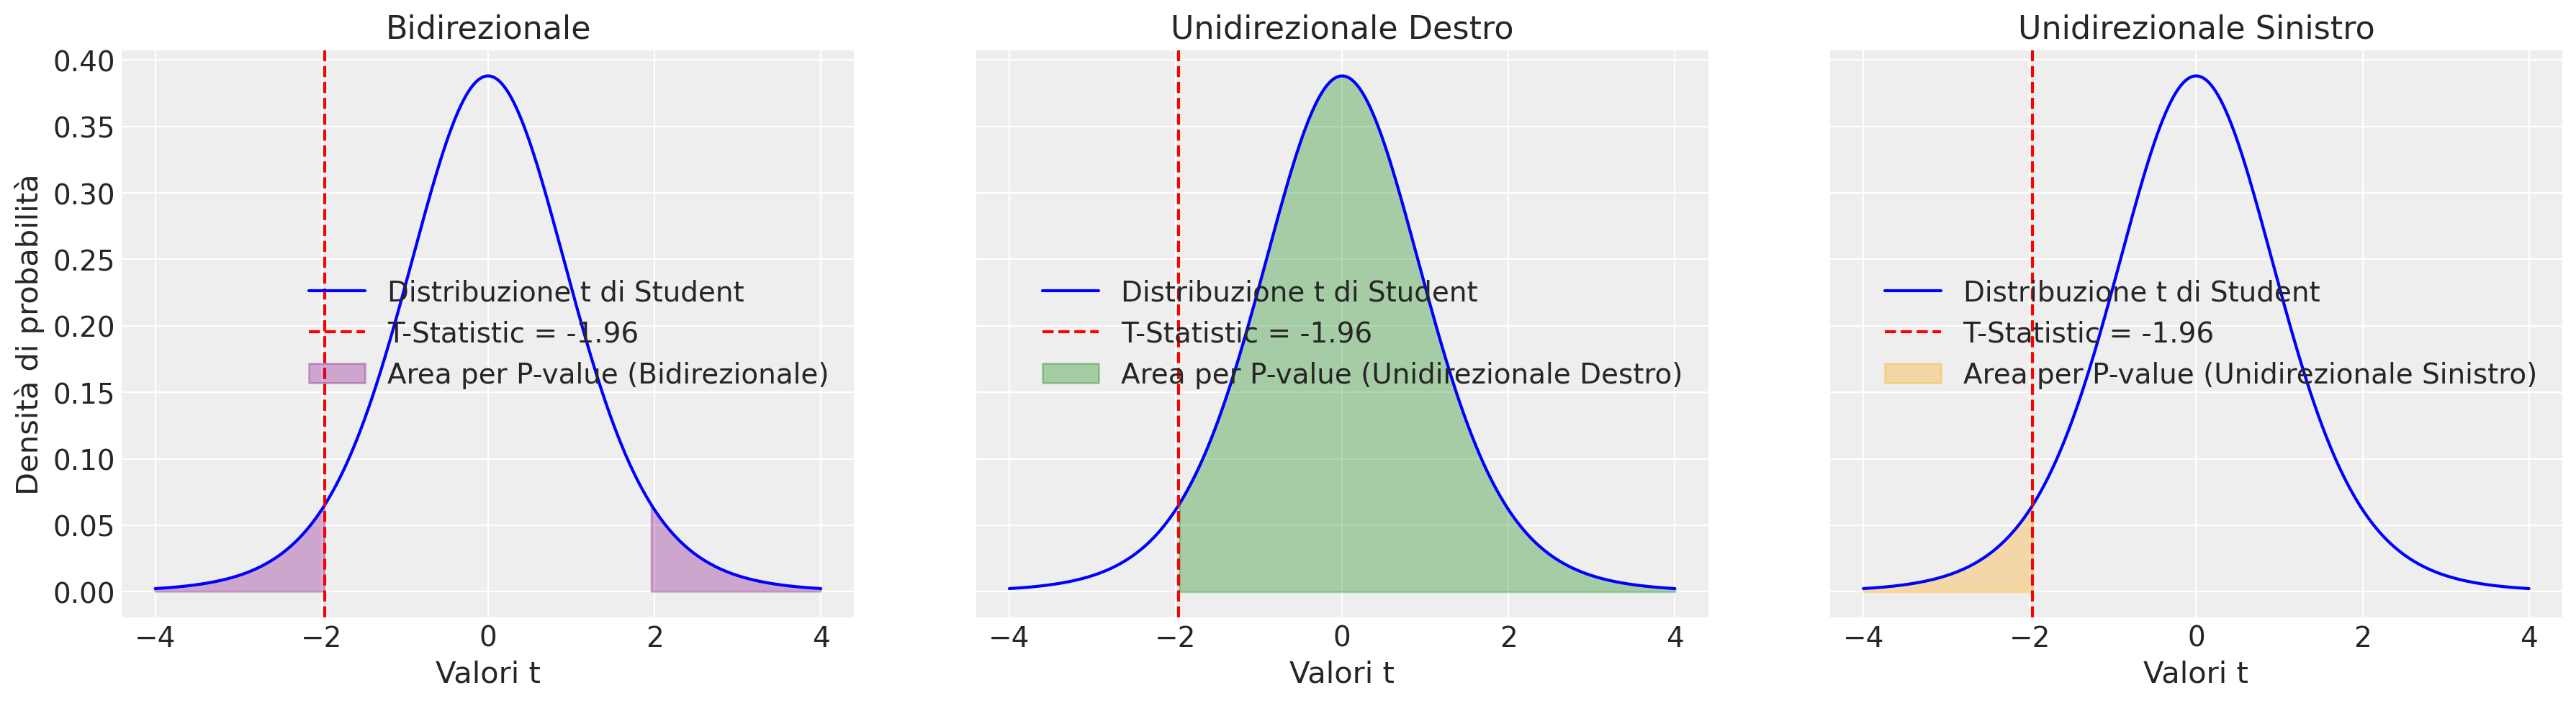

In [4]:
# Dati del campione
data = np.array([45, 50, 35, 40, 50, 35, 30, 55, 40, 60])
mu_0 = 50
n = len(data)
std_dev = np.std(data, ddof=1)
standard_error = std_dev / np.sqrt(n)
t_statistic = (np.mean(data) - mu_0) / standard_error
df = n - 1

# Creazione della distribuzione t
t_values = np.linspace(-4, 4, 1000)
t_distribution = stats.t.pdf(t_values, df)

# Creazione di tre subplot
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Titoli per i subplot
titles = ["Bidirezionale", "Unidirezionale Destro", "Unidirezionale Sinistro"]
colors = ["purple", "green", "orange"]


# Funzione per aggiungere le aree
def plot_t_dist(ax, area, color, title):
    ax.plot(t_values, t_distribution, label="Distribuzione t di Student", color="blue")
    ax.axvline(
        x=t_statistic,
        color="red",
        linestyle="--",
        label=f"T-Statistic = {t_statistic:.2f}",
    )
    ax.fill_between(
        t_values,
        0,
        t_distribution,
        where=area(t_values),
        color=color,
        alpha=0.3,
        label=f"Area per P-value ({title})",
    )
    ax.set_title(title)
    ax.set_xlabel("Valori t")
    ax.legend()


# Bidirezionale
plot_t_dist(ax[0], lambda t: np.abs(t) >= np.abs(t_statistic), colors[0], titles[0])

# Unidirezionale Destro
plot_t_dist(ax[1], lambda t: t >= t_statistic, colors[1], titles[1])

# Unidirezionale Sinistro
plot_t_dist(ax[2], lambda t: t <= t_statistic, colors[2], titles[2])

# Asse y comune
ax[0].set_ylabel("Densità di probabilità")

# Mostra grafico
plt.tight_layout()
plt.show()

Replichiamo ora i risultati usando `pingouin`. 

In [27]:
# Dati del campione
data = np.array([45, 50, 35, 40, 50, 35, 30, 55, 40, 60])
mu_0 = 50

# Calcolo del t-test Bidirezionale
results_two_tailed = pg.ttest(x=data, y=mu_0, alternative="two-sided")
print("Risultati del Test Bidirezionale:")
print(results_two_tailed)

# Calcolo del t-test Unidirezionale Destro
results_one_tailed_right = pg.ttest(x=data, y=mu_0, alternative="greater")
print("\nRisultati del Test Unidirezionale Destro:")
print(results_one_tailed_right)

# Calcolo del t-test Unidirezionale Sinistro
results_one_tailed_left = pg.ttest(x=data, y=mu_0, alternative="less")
print("\nRisultati del Test Unidirezionale Sinistro:")
print(results_one_tailed_left)

Risultati del Test Bidirezionale:
               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -1.963961    9   two-sided  0.081126  [37.09, 50.91]  0.621059  1.229   

           power  
T-test  0.418816  

Risultati del Test Unidirezionale Destro:
               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test -1.963961    9     greater  0.959437  [38.4, inf]  0.621059  0.407   

           power  
T-test  0.000255  

Risultati del Test Unidirezionale Sinistro:
               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -1.963961    9        less  0.040563  [-inf, 49.6]  0.621059  2.458   

           power  
T-test  0.567089  


### Interpretazione:
- **Test Bidirezionale**: L'ipotesi nulla viene rifiutata se il p-value è inferiore al livello di significatività $ \alpha $, indicando che la media è significativamente diversa da 50.
- **Test Monodirezionale Destro**: L'ipotesi nulla viene rifiutata se il p-value è inferiore a $ \alpha $, indicando che la media è significativamente maggiore di 50.
- **Test Monodirezionale Sinistro**: L'ipotesi nulla viene rifiutata se il p-value è inferiore a $ \alpha $, indicando che la media è significativamente inferiore a 50.

Questi passaggi dimostrano come eseguire manualmente il test t di Student in Python, distinguendo tra diversi tipi di test, il tutto basato su principi statistici frequentisti.

## Esercizio 2

Immagina di essere uno psicologo interessato a studiare l'effetto di due differenti tipi di terapia (A e B) sul livello di ansia dei pazienti. Hai raccolto i dati sui livelli di ansia di 10 pazienti per ciascuna terapia. I dati sono i seguenti:

- **Terapia A**: [23, 20, 22, 21, 24, 19, 18, 20, 21, 23]
- **Terapia B**: [27, 25, 26, 24, 28, 26, 25, 27, 26, 28]

Si richiede di:
1. Calcolare il test t di Student per due gruppi indipendenti assumendo che le varianze delle due popolazioni siano uguali.
2. Calcolare l'intervallo di confidenza del 95% per la differenza tra le due medie.
3. Eseguire i calcoli manualmente in Python.
4. Utilizzare la libreria Pingouin per confermare i risultati ottenuti.

### Soluzione

#### 1. Calcolo del test t di Student per due gruppi indipendenti

Iniziamo con i calcoli manuali. Dobbiamo calcolare la media, la varianza e la deviazione standard per ciascun gruppo, quindi utilizzare queste informazioni per calcolare il valore del test t.

In [3]:
# Dati
terapia_A = np.array([23, 20, 22, 21, 24, 19, 18, 20, 21, 23])
terapia_B = np.array([27, 25, 26, 24, 28, 26, 25, 27, 26, 28])

# Calcolo delle medie
mean_A = np.mean(terapia_A)
mean_B = np.mean(terapia_B)

# Calcolo delle varianze
var_A = np.var(terapia_A, ddof=1)
var_B = np.var(terapia_B, ddof=1)

# Calcolo della varianza combinata
n_A = len(terapia_A)
n_B = len(terapia_B)
pooled_var = ((n_A - 1) * var_A + (n_B - 1) * var_B) / (n_A + n_B - 2)

# Calcolo dell'errore standard della differenza delle medie
se = np.sqrt(pooled_var * (1 / n_A + 1 / n_B))

# Calcolo del valore t
t_stat = (mean_A - mean_B) / se

# Gradi di libertà
df = n_A + n_B - 2

# P-value
p_value = 2 * stats.t.cdf(-abs(t_stat), df)

# Intervallo di confidenza del 95%
ci = stats.t.interval(0.95, df, loc=(mean_A - mean_B), scale=se)

# Output dei risultati
print(f"Media Terapia A: {mean_A}")
print(f"Media Terapia B: {mean_B}")
print(f"Varianza Terapia A: {var_A}")
print(f"Varianza Terapia B: {var_B}")
print(f"Varianza combinata: {pooled_var}")
print(f"Errore standard: {se}")
print(f"Valore t: {t_stat}")
print(f"P-value: {p_value}")
print(f"Intervallo di confidenza al 95%: {ci}")

Media Terapia A: 21.1
Media Terapia B: 26.2
Varianza Terapia A: 3.6555555555555554
Varianza Terapia B: 1.7333333333333334
Varianza combinata: 2.6944444444444446
Errore standard: 0.7340905181848414
Valore t: -6.947372120553443
P-value: 1.7185095025904068e-06
Intervallo di confidenza al 95%: (-6.642266949186438, -3.5577330508135576)


#### 2. Calcolo utilizzando Pingouin

Utilizziamo la libreria Pingouin per confermare i risultati ottenuti.

In [4]:
# Creazione del DataFrame
data = pd.DataFrame(
    {
        "gruppo": ["A"] * n_A + ["B"] * n_B,
        "ansia": np.concatenate([terapia_A, terapia_B]),
    }
)

# Esecuzione del test t
test_t = pg.ttest(
    data[data["gruppo"] == "A"]["ansia"],
    data[data["gruppo"] == "B"]["ansia"],
    correction=False,
)

# Output dei risultati
print(test_t)

               T  dof alternative     p-val           CI95%   cohen-d  \
T-test -6.947372   18   two-sided  0.000002  [-6.64, -3.56]  3.106959   

            BF10     power  
T-test  6649.934  0.999998  


I risultati ottenuti da Pingouin confermano i valori calcolati manualmente, mostrando un valore t simile, un p-value molto basso e un intervallo di confidenza che non include zero, confermando che la differenza tra le due terapie è degna di nota.

## Esercizio 3

Modello di regressione.

Predire il punteggio di stress (y) considerando un numero di ore di sonno (x) pari a 7, dopo aver fittato un modello di regressione lineare ai dati.

In [7]:
# Dati ipotetici
data = {
    "Ore_sonno": [6, 7, 8, 5, 7, 6, 8, 7, 5, 6],
    "Punteggio_stress": [70, 65, 60, 75, 64, 68, 62, 66, 74, 69],
}

df = pd.DataFrame(data)
print(df)

   Ore_sonno  Punteggio_stress
0          6                70
1          7                65
2          8                60
3          5                75
4          7                64
5          6                68
6          8                62
7          7                66
8          5                74
9          6                69


In [9]:
# Esegui la regressione lineare
reg = pg.linear_regression(df[["Ore_sonno"]], df["Punteggio_stress"])
print(reg)

       names       coef        se          T          pval        r2  \
0  Intercept  96.085714  2.052359  46.817209  4.789361e-11  0.961834   
1  Ore_sonno  -4.428571  0.311896 -14.198887  5.892825e-07  0.961834   

     adj_r2   CI[2.5%]   CI[97.5%]  
0  0.957063  91.352966  100.818462  
1  0.957063  -5.147804   -3.709339  


In [11]:
# Predici il punteggio di stress per un numero specifico di ore di sonno
ore_sonno_nuove = 7
y_pred = reg["coef"][0] + reg["coef"][1] * ore_sonno_nuove

print(f"Punteggio di stress predetto per {ore_sonno_nuove} ore di sonno: {y_pred}")

Punteggio di stress predetto per 7 ore di sonno: 65.08571428571426


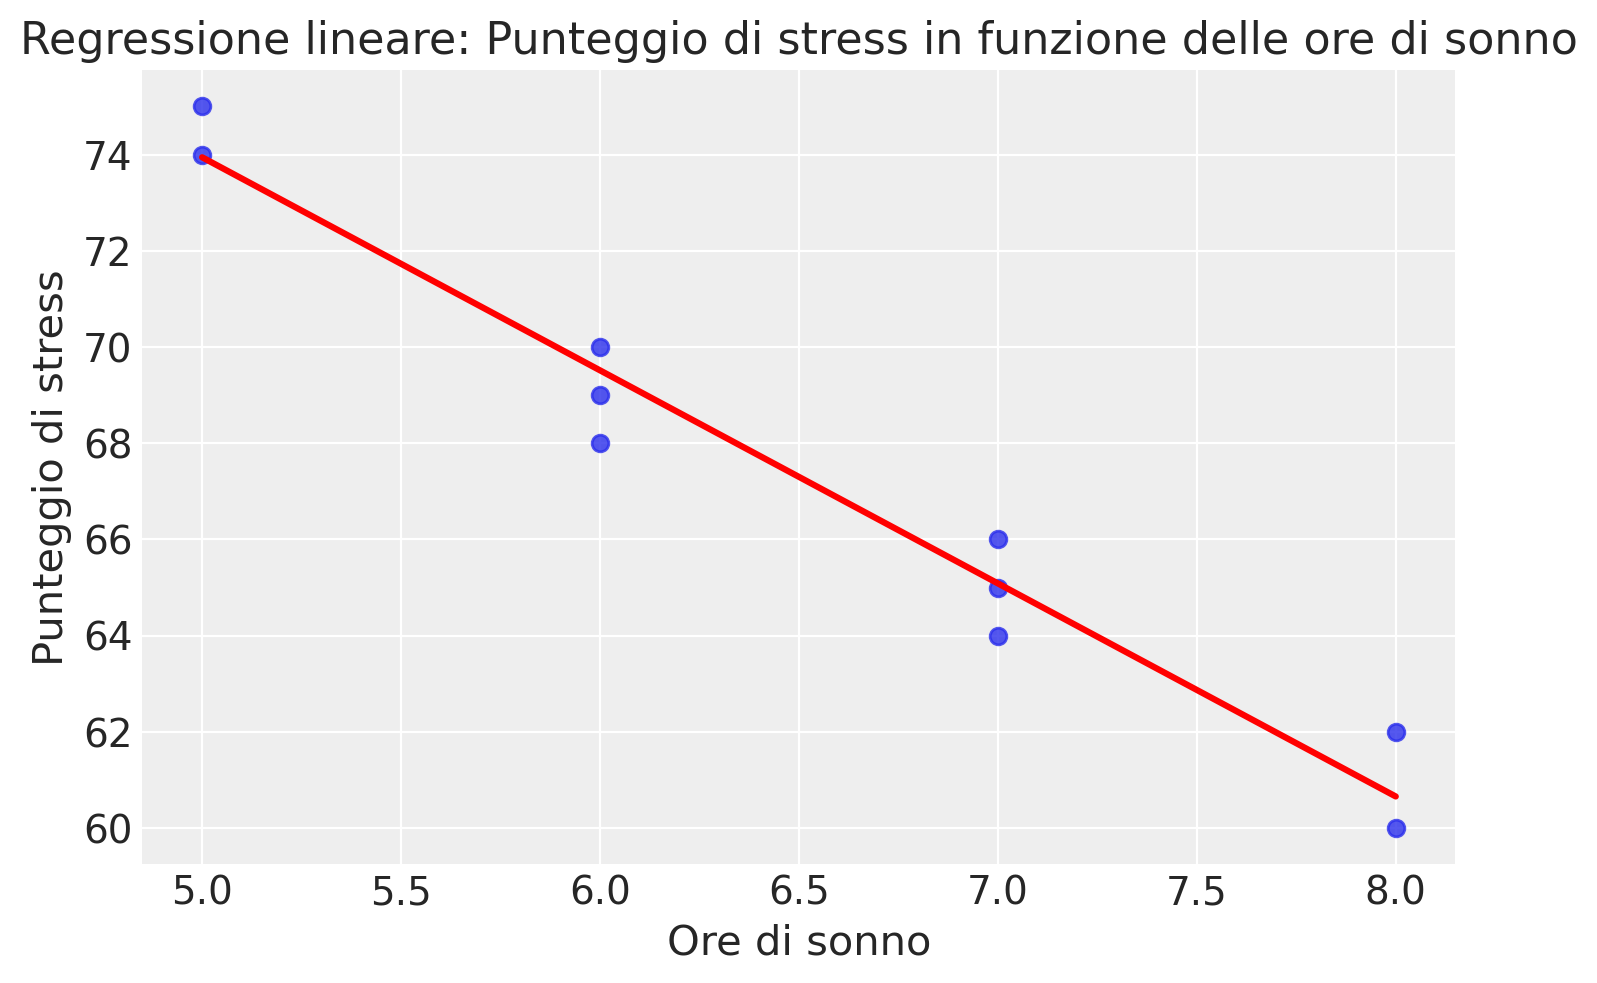

In [14]:
sns.regplot(
    x="Ore_sonno", y="Punteggio_stress", data=df, ci=None, line_kws={"color": "red"}
)
plt.xlabel("Ore di sonno")
plt.ylabel("Punteggio di stress")
plt.title("Punteggio di stress in funzione delle ore di sonno")
plt.show()

Interpretare il coefficiente b.

Calcolare il valore predetto di stress in corrispondenza del numero medio di ore di sonno.

In [15]:
df["Ore_centrate"] = df["Ore_sonno"] - np.mean(df["Ore_sonno"])

In [16]:
reg = pg.linear_regression(df[["Ore_centrate"]], df["Punteggio_stress"])
print(reg)

          names       coef        se           T          pval        r2  \
0     Intercept  67.300000  0.319598  210.577063  2.894993e-16  0.961834   
1  Ore_centrate  -4.428571  0.311896  -14.198887  5.892825e-07  0.961834   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.957063  66.563006  68.036994  
1  0.957063  -5.147804  -3.709339  


## Esercizio 4

Per i dati seguenti, trovare il valore predetto dello stress per un uomo che dorme 7 ore.

In [21]:
# Dati ipotetici
data = {
    "Ore_sonno": [6, 7, 8, 5, 7, 6, 8, 7, 5, 6],
    "Punteggio_stress": [
        70,
        80,
        68,
        85,
        64,
        90,
        65,
        66,
        85,
        95,
    ],  # Stress più alto per le donne (genere=0)
    "Genere": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],  # 1 = uomo, 0 = donna
}

df = pd.DataFrame(data)
print(df)

   Ore_sonno  Punteggio_stress  Genere
0          6                70       1
1          7                80       0
2          8                68       1
3          5                85       0
4          7                64       1
5          6                90       0
6          8                65       0
7          7                66       1
8          5                85       1
9          6                95       0


In [22]:
# Aggiungi l'interazione tra ore di sonno e genere
df["Interazione"] = df["Ore_sonno"] * df["Genere"]

In [23]:
# Esegui la regressione lineare
reg = pg.linear_regression(
    df[["Ore_sonno", "Genere", "Interazione"]], df["Punteggio_stress"]
)

In [24]:
# Mostra i risultati della regressione
print(reg)

         names        coef         se         T      pval        r2    adj_r2  \
0    Intercept  133.461538  20.212810  6.602820  0.000580  0.745727  0.618591   
1    Ore_sonno   -7.884615   3.118904 -2.528008  0.044800  0.745727  0.618591   
2       Genere  -23.769231  29.024249 -0.818944  0.444121  0.745727  0.618591   
3  Interazione    1.961538   4.410797  0.444713  0.672120  0.745727  0.618591   

    CI[2.5%]   CI[97.5%]  
0  84.002574  182.920503  
1 -15.516299   -0.252931  
2 -94.789011   47.250549  
3  -8.831292   12.754369  


In [25]:
# Predici il punteggio di stress per un individuo specifico
ore_sonno_nuove = 7
genere_nuovo = 1  # 1 = uomo, 0 = donna
interazione_nuova = ore_sonno_nuove * genere_nuovo

y_pred = (
    reg["coef"][0]
    + reg["coef"][1] * ore_sonno_nuove
    + reg["coef"][2] * genere_nuovo
    + reg["coef"][3] * interazione_nuova
)

print(
    f"Punteggio di stress predetto per {ore_sonno_nuove} ore di sonno e genere {'uomo' if genere_nuovo == 1 else 'donna'}: {y_pred}"
)

Punteggio di stress predetto per 7 ore di sonno e genere uomo: 68.23076923076923


/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


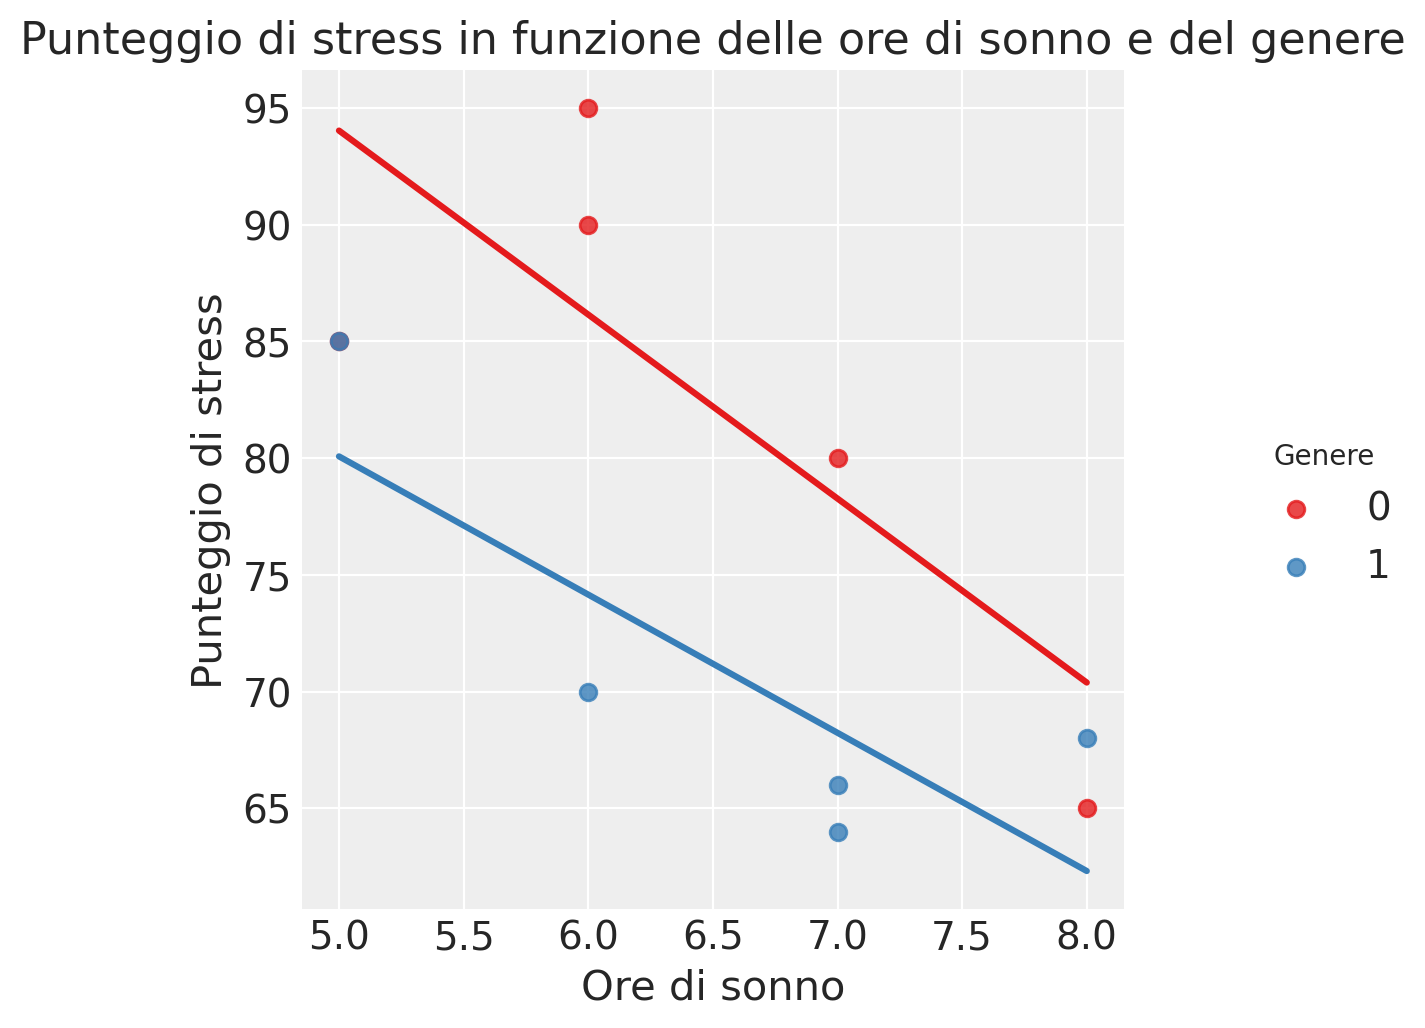

In [27]:
# Crea una visualizzazione della regressione separata per genere
sns.lmplot(
    x="Ore_sonno", y="Punteggio_stress", hue="Genere", data=df, ci=None, palette="Set1"
)
plt.xlabel("Ore di sonno")
plt.ylabel("Punteggio di stress")
plt.title(
    "Punteggio di stress in funzione delle ore di sonno e del genere"
)
plt.show()

## Informazioni sull'Ambiente di Sviluppo

In [32]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Mon May 13 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
matplotlib: 3.8.4
scipy     : 1.13.0
arviz     : 0.18.0
pingouin  : 0.5.4
pandas    : 2.2.2

Watermark: 2.4.3

